In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

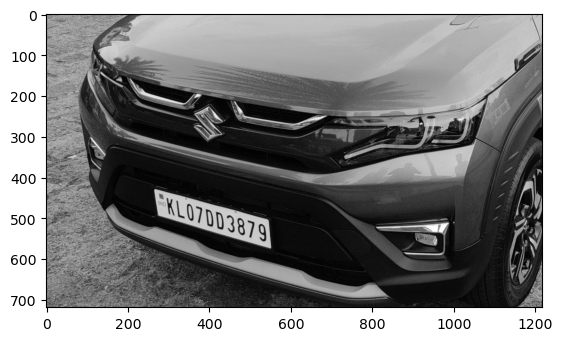

In [4]:
img=cv2.imread('/Users/joelsmatthew/Downloads/Car.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))  #Cause matplotlib expects rgb.

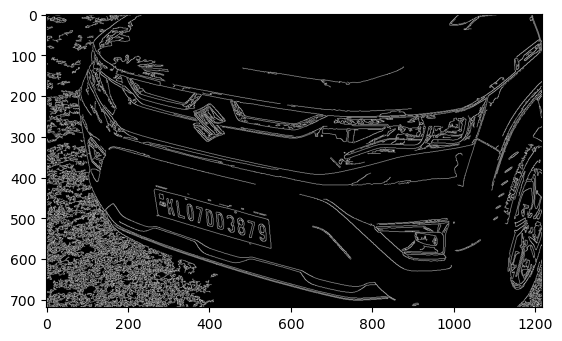

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Returns contours in simplified approx form in a tree structure.
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)  # Approximate the contour with a maximum deviation of 10 pixels from the original contour.
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[266, 430]],

       [[277, 495]],

       [[552, 575]],

       [[544, 503]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

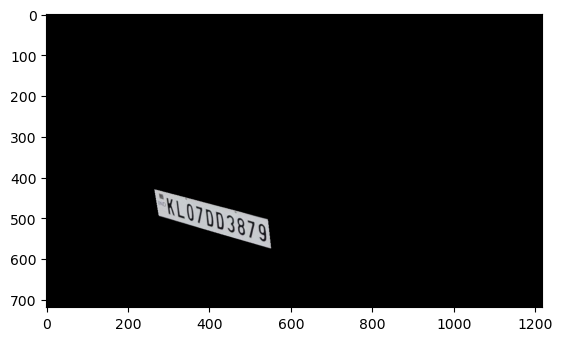

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)   #Restoring area where image is not black
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

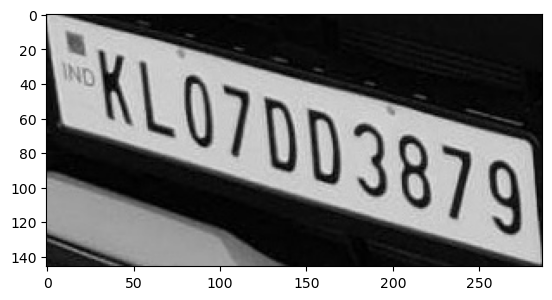

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[7, 25], [31, 25], [31, 45], [7, 45]], 'IND', 0.8153164441893388),
 ([[29.432765879688652, 6.023020320170438],
   [297.98156071871153, 84.49225012954825],
   [277.56723412031135, 142.97697967982955],
   [9.018439281288444, 65.50774987045175]],
  'KL07003879',
  0.7835831409942617)]

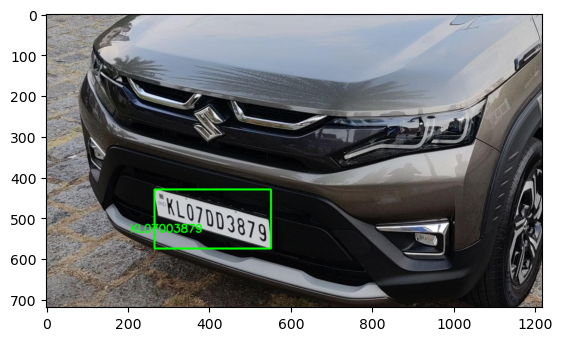

In [14]:
text = result[1][-2]  # Accessing the second element instead of the first
font = cv2.FONT_HERSHEY_SIMPLEX
text_size = cv2.getTextSize(text, font, 0.9, 2)[0]
text_x = max(0, approx[0][0][0] - 60)  # Adjusted x-coordinate to ensure text doesn't go out of frame
text_y = max(0, approx[1][0][1] + 60 - 20)  # Adjusted y-coordinate to ensure text doesn't go out of frame
res = cv2.putText(img, text=text, org=(int(text_x), int(text_y)), fontFace=font, fontScale=0.9, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))